In [12]:
%matplotlib inline

In [13]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings("ignore")

# Actual Data

In [14]:
alarm = pd.read_csv('/home/bhanuchander/alarm.csv')
print alarm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17999 entries, 0 to 17998
Data columns (total 30 columns):
ID                        17999 non-null int64
CREATIONTIME              17999 non-null int64
TIME                      17999 non-null int64
OPERATIONTYPE             17999 non-null object
ALARMID                   17999 non-null int64
EVENTID                   17999 non-null int64
MOID                      17999 non-null int64
OBJECTTYPE                17999 non-null object
ALARMIDENTIFIER           0 non-null float64
LAYERRATE                 2475 non-null object
TYPE                      17999 non-null object
FUNCTYPE                  17999 non-null object
PROBABLECAUSE             17999 non-null object
PROBABLECAUSEQUALIFIER    17659 non-null object
GRANULARITY               0 non-null float64
PMPARAMNAME               0 non-null float64
PMLOCATION                0 non-null float64
THRESHOLDTYPE             0 non-null float64
STANDARDNAME              2512 non-null object
NA

## Feature Selection

In [15]:
# Configuring plot fonts

matplotlib.rc('font', **font)

alarm = pd.read_csv('/home/bhanuchander/alarm.csv')

alarm['TIME'] = pd.to_datetime(alarm['TIME'], unit='ms')

alarm['DAY'] = alarm['TIME'].dt.weekday_name

alarm['HOUR'] = alarm['TIME'].dt.hour

# alarm.ix[alarm['HOUR'] <= 13, 'HOUR'] = 'FORE_NOON'
# alarm.ix[alarm['HOUR'] > 13, 'HOUR'] = 'AFTER_NOON'
alarm['HOUR'][(alarm['HOUR'] >= 4) & (alarm['HOUR'] > 18)]= 'NIGHT'
alarm['HOUR'][(alarm['HOUR'] >= 13) & (alarm['HOUR'] < 18)]= 'AN'
alarm['HOUR'][alarm['HOUR'] < 13 ]= 'FN'

print alarm['HOUR'].value_counts()

names = ['OBJECTTYPE', 'PROBABLECAUSE', 'SEVERITY', 'DAY', 'HOUR']

alarm = alarm[names]

print 'Observations : ', alarm.shape[0]

print 'Columns      : ', alarm.shape[1]

print alarm.head()

FN       17001
AN         996
NIGHT        2
Name: HOUR, dtype: int64
Observations :  17999
Columns      :  5
     OBJECTTYPE            PROBABLECAUSE  SEVERITY        DAY HOUR
0  TransportEMS          SESSION_FAILURE  CRITICAL  Wednesday   FN
1  TransportEMS    EVENT_CHANNEL_FAILURE  CRITICAL  Wednesday   FN
2     Equipment            CARD_OUT_TEST  CRITICAL  Wednesday   FN
3     Equipment            CARD_OUT_TEST     CLEAR  Wednesday   FN
4     Equipment  EQUIPMENT_FAULT_SA_TEST  CRITICAL  Wednesday   FN


# Visualizing the Data

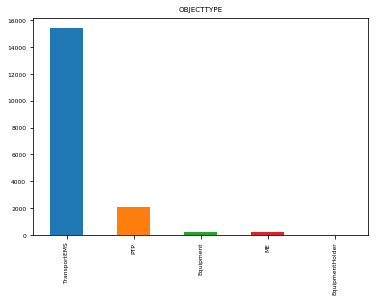

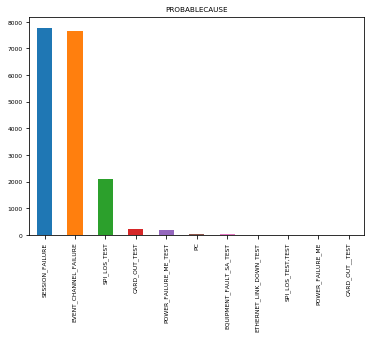

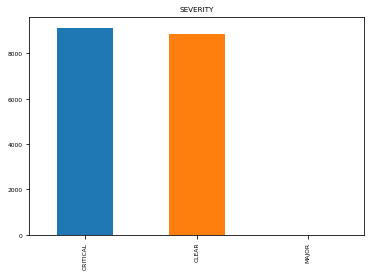

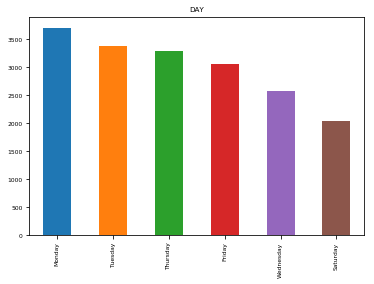

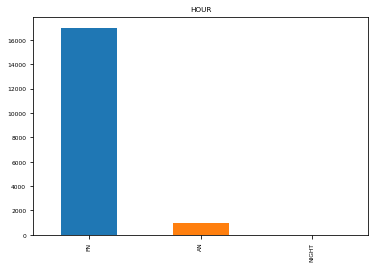

In [16]:
for n in names:
    alarm[n].value_counts().plot(kind="bar")
    plt.title(n)
    plt.show()

## Implementing Association Rule Mining

In [19]:
dataset = []
for i in range(0, alarm.shape[0]-1):
    dataset.append([str(alarm.values[i,j]) for j in range(0, alarm.shape[1])])
# dataset = alarm.to_xarray()

oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)

output = apriori(df, min_support=0.1, use_colnames=oht.columns_)

output.sort_values(by=['support'])

print output

     support                                           itemsets
0   0.491832                                            (CLEAR)
1   0.507945                                         (CRITICAL)
2   0.425047                            (EVENT_CHANNEL_FAILURE)
3   0.944605                                               (FN)
4   0.168963                                           (Friday)
5   0.205467                                           (Monday)
6   0.117846                                              (PTP)
7   0.431881                                  (SESSION_FAILURE)
8   0.115680                                     (SPI_LOS_TEST)
9   0.113013                                         (Saturday)
10  0.182298                                         (Thursday)
11  0.856929                                     (TransportEMS)
12  0.187354                                          (Tuesday)
13  0.142905                                        (Wednesday)
14  0.212468                     (CLEAR,

## Configuration

In [24]:
config = [
    ('antecedent support', 0.3),
    ('support', 0.3),
    ('confidence', 0.5),
    ('conviction', 10)
]

## Extracting the Association Rules

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
----------------------------------------------
For the Metric :  antecedent support  Value :  0.3
----------------------------------------------
                                   antecedents  \
0                           (TransportEMS, FN)   
1                               (TransportEMS)   
2                                         (FN)   
3                        (SESSION_FAILURE, FN)   
4                               (CRITICAL, FN)   
5                            (SESSION_FAILURE)   
6                                   (CRITICAL)   
7                                         (FN)   
8                               (TransportEMS)   
9                      (EVENT_CHANNEL_FAILURE)   
10                     (EVENT_CHANNEL_FAILURE)   
11                                        (FN)   
12                           (SESSION_FAILURE)   
13                          

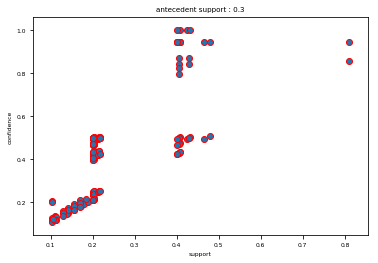

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
----------------------------------------------
For the Metric :  support  Value :  0.3
----------------------------------------------
                              antecedents  \
0                          (TransportEMS)   
1                 (EVENT_CHANNEL_FAILURE)   
2                 (EVENT_CHANNEL_FAILURE)   
3                                    (FN)   
4                          (TransportEMS)   
5                                 (CLEAR)   
6                              (CRITICAL)   
7                                    (FN)   
8         (TransportEMS, SESSION_FAILURE)   
9                      (TransportEMS, FN)   
10                  (SESSION_FAILURE, FN)   
11                         (TransportEMS)   
12                      (SESSION_FAILURE)   
13                                   (FN)   
14               (TransportEMS, CRITICAL)   
15                 

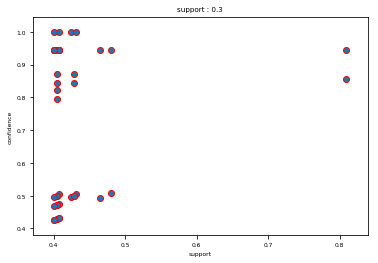

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
----------------------------------------------
For the Metric :  confidence  Value :  0.5
----------------------------------------------
                                      antecedents               consequents  \
0                        (TransportEMS, Saturday)                      (FN)   
1                                  (Saturday, FN)            (TransportEMS)   
2                                      (Saturday)        (TransportEMS, FN)   
3                     (SESSION_FAILURE, CRITICAL)                      (FN)   
4                           (SESSION_FAILURE, FN)                (CRITICAL)   
5                         (EVENT_CHANNEL_FAILURE)            (TransportEMS)   
6                         (EVENT_CHANNEL_FAILURE)                      (FN)   
7                               (SESSION_FAILURE)                (CRITICAL)   
8                       (

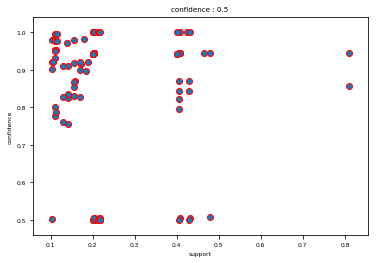

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
----------------------------------------------
For the Metric :  conviction  Value :  10
----------------------------------------------
                              antecedents         consequents  conviction
0                 (EVENT_CHANNEL_FAILURE)      (TransportEMS)         inf
1      (CLEAR, EVENT_CHANNEL_FAILURE, FN)      (TransportEMS)         inf
2          (CLEAR, EVENT_CHANNEL_FAILURE)      (TransportEMS)         inf
3                   (SESSION_FAILURE, FN)      (TransportEMS)         inf
4         (SESSION_FAILURE, CRITICAL, FN)      (TransportEMS)         inf
5   (EVENT_CHANNEL_FAILURE, CRITICAL, FN)      (TransportEMS)         inf
6                       (SESSION_FAILURE)      (TransportEMS)         inf
7            (SESSION_FAILURE, CLEAR, FN)      (TransportEMS)         inf
8                      (SPI_LOS_TEST, FN)               (PTP)  250.0275

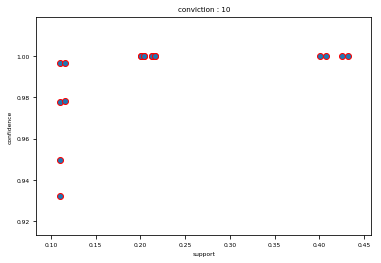

In [25]:
for metric_type, th in config:
    rules = association_rules(output, metric=metric_type, min_threshold=th)
    if rules.empty:
        print 'Empty Data Frame For Metric Type : ',metric_type,' on Threshold : ',th
        continue
    print rules.columns.values
    print '----------------------------------------------'
    print 'For the Metric : ', metric_type, ' Value : ', th
    print '----------------------------------------------'
    print rules[['antecedents', 'consequents', metric_type]]

    support=rules.as_matrix(columns=['support'])
    confidence=rules.as_matrix(columns=['confidence'])

    plt.scatter(support, confidence, edgecolors='red')
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(metric_type+' : '+str(th))
    plt.show()

## Interesting Information About Alarms Simulation

#### Metrics :
---

##### Support :

```         
    (FN)        ...                   0.944605
```

##### Confidence :

```
    (PTP)                                  (SPI_LOS_TEST, FN)    0.932107
    
    (TransportEMS, EVENT_CHANNEL_FAILURE)  (CRITICAL)            0.500131
```
---

#### Observation:
---

- Actually **94.46%** Alarms are created on Session : **FN**. It means, employee like to work on **FN** than **AN**.


- Alarm Created on Inventory : **PTP** has *93.21%* confidence With Probable Cause : **SPI_LOS_TEST**, Session : **FN**.

            
- Alarm Created on Inventory : **TransportEMS** with **EVENT_CHANNEL_FAILURE** has **50.01%** Confidence with Severity Level : **CRITICAL**.

---

And a Lot .... :)
        